In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [16]:
data=pd.read_csv("dolar.csv",sep=";")
data["fecha"]=pd.to_datetime(data["fecha"],format="%d-%m-%y")
data=data.set_index("fecha")
data.head()

,valor
fecha,
2021-01-04,710.95
2021-01-05,702.93
2021-01-06,702.29
2021-01-07,696.18
2021-01-08,709.99


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2021-01-04 to 2023-12-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   744 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [18]:
data.head(5)

,valor
fecha,
2021-01-04,710.95
2021-01-05,702.93
2021-01-06,702.29
2021-01-07,696.18
2021-01-08,709.99


In [19]:
y=data["valor"].to_numpy()

In [20]:
y

array([ 710.95,  702.93,  702.29,  696.18,  709.99,  713.28,  718.89,
        725.24,  739.72,  735.35,  735.06,  736.11,  733.73,  730.38,
        715.56,  724.26,  731.92,  731.  ,  736.88,  741.4 ,  734.62,
        731.66,  734.86,  730.53,  737.23,  736.65,  735.07,  733.13,
        728.9 ,  722.52,  724.39,  718.45,  717.38,  719.78,  712.14,
        707.12,  709.65,  706.76,  703.65,  708.04,  719.91,  721.2 ,
        726.74,  731.3 ,  729.15,  733.11,  738.46,  733.42,  728.89,
        718.4 ,  718.37,  721.49,  723.47,  730.93,  724.59,  717.96,
        716.46,  720.62,  723.35,  730.82,  729.5 ,  736.17,  732.11,
        721.82,  717.12,  717.9 ,  718.17,  714.21,  708.09,  711.23,
        709.51,  708.71,  707.25,  701.98,  701.55,  700.96,  697.19,
        696.8 ,  705.41,  712.54,  707.05,  702.02,  700.15,  705.09,
        711.06,  706.29,  705.25,  703.09,  701.27,  694.47,  693.74,
        700.04,  707.19,  708.64,  703.17,  715.62,  713.63,  715.31,
        716.41,  727

In [21]:
from statsmodels.tsa.stattools import adfuller
resultado=adfuller(y,maxlag=7)
print("p-value=",resultado[1])

p-value= 0.23643587546009454


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime

In [23]:
puntos = [datetime.strptime("01-01-2021","%d-%m-%Y"),
        datetime.strptime("01-04-2021","%d-%m-%Y"),
        datetime.strptime("01-08-2021","%d-%m-%Y"),
        datetime.strptime("01-01-2022","%d-%m-%Y"),
        datetime.strptime("01-04-2022","%d-%m-%Y"),
        datetime.strptime("01-08-2022","%d-%m-%Y"),
        datetime.strptime("01-01-2023","%d-%m-%Y"),
        datetime.strptime("01-04-2023","%d-%m-%Y"),
        datetime.strptime("01-08-2023","%d-%m-%Y"),
        datetime.strptime("01-12-2023","%d-%m-%Y")]

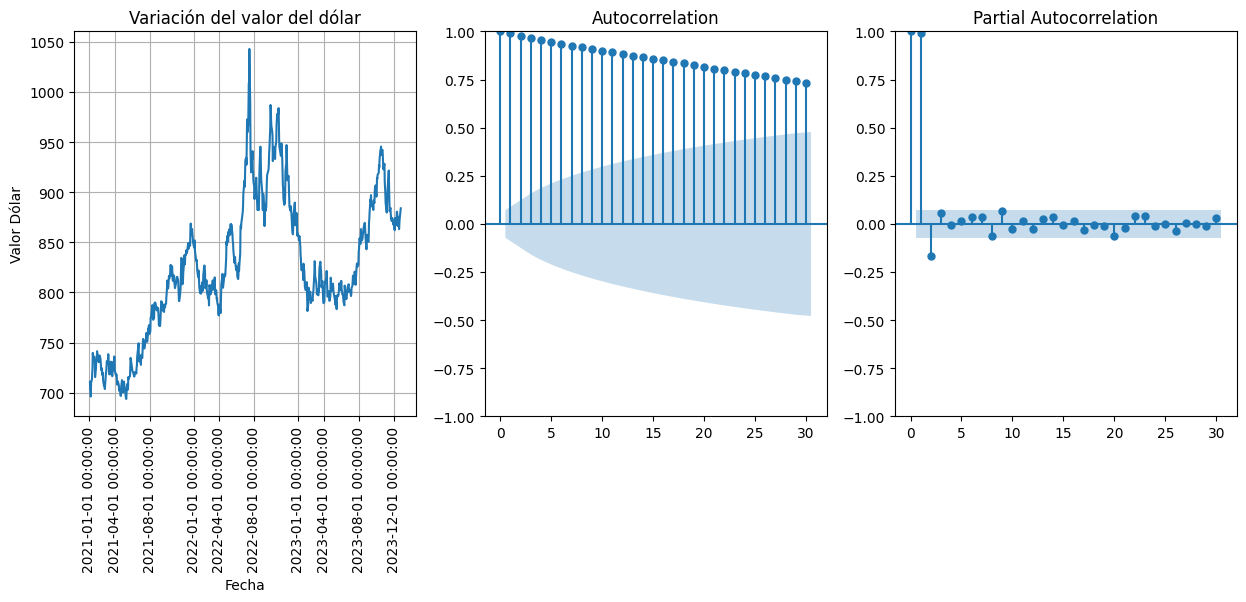

In [26]:
fig, axes=plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(data.index,y)
axes[0].set_xticks(puntos)
axes[0].set_xticklabels(list(map(str,puntos)),rotation=90)
axes[0].grid(True);
axes[0].set_xlabel("Fecha");
axes[0].set_ylabel("Valor Dólar");
axes[0].set_title("Variación del valor del dólar");
plot_acf(y,lags=30,ax=axes[1]);
plot_pacf(y,lags=30,ax=axes[2]);

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
modelo=ARIMA(y,order=(1,0,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 77.99591905559959


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  744
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2588.708
Date:                Fri, 13 Dec 2024   AIC                           5185.415
Time:                        21:39:31   BIC                           5203.863
Sample:                             0   HQIC                          5192.526
                                - 744                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        823.2170     30.395     27.084      0.000     763.644     882.790
ar.L1          0.9908      0.004    263.383      0.000       0.983       0.998
ma.L1          0.2414      0.019     12.761      0.000       0.204       0.278
sigma2        61.2499      1.842     33.244      0.000      57.639      64.861
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1008.41
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
modelo=ARIMA(y,order=(40,1,2))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 736.8284471548303


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  744
Model:                ARIMA(40, 1, 2)   Log Likelihood               -2559.892
Date:                Fri, 13 Dec 2024   AIC                           5205.783
Time:                        21:43:54   BIC                           5404.043
Sample:                             0   HQIC                          5282.210
                                - 744                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6880      7.282      0.094      0.925     -13.584      14.960
ar.L2          0.1389      7.957      0.017      0.986     -15.457      15.735
ar.L3         -0.0322      2.146     -0.015      0.988      -4.239       4.174
ar.L4          0.0275      0.620      0.044      0.965      -1.188       1.243
ar.L5         -0.0401      0.066     -0.605      0.545      -0.170       0.090
ar.L6         -0.0237      0.273     -0.087      0.931      -0.559       0.511
ar.L7          0.1312      0.080      1.634      0.102      -0.026       0.289
ar.L8         -0.1039      0.980     -0.106      0.916      -2.025       1.817
ar.L9          0.0094      1.150      0.008      0.993      -2.245       2.264
ar.L10         0.0248      0.530      0.047      0.963      -1.014       1.064
ar.L11         0.0300      0.058      0.521      0.602      -0.083       0.143
ar.L12        -0.0464      0.227     -0.204      0.838      -0.492       0.399
ar.L13        -0.0201      0.428     -0.047      0.963      -0.859       0.819
ar.L14        -0.0072      0.055     -0.132      0.895      -0.115       0.100
ar.L15         0.0127      0.085      0.150      0.881      -0.153       0.179
ar.L16         0.0748      0.134      0.556      0.578      -0.189       0.338
ar.L17        -0.0414      0.502     -0.082      0.934      -1.026       0.943
ar.L18        -0.0013      0.505     -0.003      0.998      -0.992       0.989
ar.L19         0.0793      0.196      0.405      0.685      -0.304       0.463
ar.L20        -0.0271      0.496     -0.055      0.956      -0.999       0.945
ar.L21        -0.0926      0.402     -0.230      0.818      -0.881       0.696
ar.L22        -0.0140      0.514     -0.027      0.978      -1.021       0.993
ar.L23         0.0102      0.115      0.089      0.929      -0.215       0.235
ar.L24         0.0263      0.056      0.466      0.641      -0.084       0.137
ar.L25         0.0470      0.188      0.250      0.802      -0.321       0.415
ar.L26        -0.0512      0.271     -0.189      0.850      -0.582       0.479
ar.L27        -0.0251      0.483     -0.052      0.959      -0.973       0.922
ar.L28         0.0284      0.052      0.546      0.585      -0.074       0.130
ar.L29        -0.0508      0.209     -0.243      0.808      -0.460       0.358
ar.L30         0.0514      0.451      0.114      0.909      -0.833       0.936
ar.L31        -0.0594      0.559     -0.106      0.915      -1.155       1.036
ar.L32         0.0146      0.654      0.022      0.982      -1.268       1.297
ar.L33        -0.0241      0.367     -0.066      0.948      -0.743       0.695
ar.L34         0.0283      0.319      0.089      0.929      -0.597       0.654
ar.L35         0.0127      0.340      0.037      0.970      -0.654       0.679
ar.L36        -0.0439      0.060     -0.731      0.465      -0.162       0.074
ar.L37         0.0487      0.301      0.161      0.872      -0.542       0.639
ar.L38        -0.0151      0.478     -0.032      0.975      -0.951       0.921
ar

In [67]:
horizonte=20
y[-horizonte:]

array([873.89, 872.03, 869.47, 867.86, 869.56, 862.86, 862.08, 874.25,
       874.42, 868.01, 880.  , 880.62, 876.77, 866.37, 872.59, 875.48,
       863.23, 868.77, 872.95, 883.99])

In [68]:
horizonte=10
x=[i for i in range(len(y[-horizonte:]))]
x_p=np.add(x,horizonte)

In [69]:
modelo_pred=predictor.get_forecast(steps=horizonte)
modelo_ci=modelo_pred.conf_int(0.05)
y_pred=modelo_pred.predicted_mean

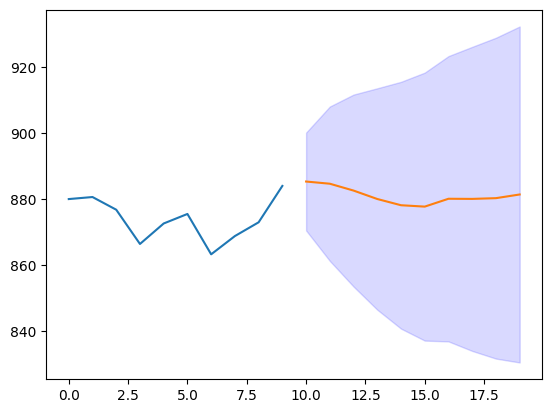

In [70]:
plt.plot(x,y[-horizonte:],
         x_p,y_pred)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [71]:
train=data.query("fecha.dt.year in (2021,2022)")

In [72]:
test=data.query("fecha.dt.year==2023")

In [73]:
y_train=train["valor"].to_numpy()
y_test=test["valor"].to_numpy()

In [82]:
modelo=ARIMA(y_train,order=(2,1,40))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE 1074.3407327590987


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                ARIMA(2, 1, 40)   Log Likelihood               -1744.418
Date:                Fri, 13 Dec 2024   AIC                           3574.835
Time:                        21:50:56   BIC                           3755.978
Sample:                             0   HQIC                          3645.921
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1917      0.669     -0.287      0.774      -1.502       1.119
ar.L2         -0.5551      0.577     -0.963      0.336      -1.685       0.575
ma.L1          0.4187      0.666      0.628      0.530      -0.887       1.725
ma.L2          0.5550      0.656      0.846      0.397      -0.730       1.840
ma.L3          0.0825      0.139      0.595      0.552      -0.189       0.354
ma.L4         -0.0196      0.063     -0.313      0.755      -0.142       0.103
ma.L5         -0.0822      0.065     -1.262      0.207      -0.210       0.045
ma.L6         -0.0442      0.076     -0.582      0.561      -0.193       0.105
ma.L7          0.0455      0.079      0.577      0.564      -0.109       0.200
ma.L8         -0.0475      0.091     -0.524      0.600      -0.225       0.130
ma.L9          0.0173      0.082      0.212      0.832      -0.143       0.177
ma.L10        -0.0379      0.072     -0.526      0.599      -0.179       0.103
ma.L11         0.0137      0.062      0.221      0.825      -0.108       0.135
ma.L12        -0.0430      0.066     -0.653      0.514      -0.172       0.086
ma.L13        -0.0401      0.071     -0.569      0.570      -0.178       0.098
ma.L14        -0.1214      0.083     -1.454      0.146      -0.285       0.042
ma.L15        -0.0903      0.098     -0.925      0.355      -0.282       0.101
ma.L16        -0.0361      0.096     -0.378      0.706      -0.223       0.151
ma.L17        -0.0005      0.075     -0.007      0.994      -0.147       0.146
ma.L18         0.0963      0.073      1.321      0.186      -0.047       0.239
ma.L19         0.0893      0.091      0.986      0.324      -0.088       0.267
ma.L20         0.1178      0.097      1.214      0.225      -0.072       0.308
ma.L21        -0.0056      0.089     -0.063      0.950      -0.180       0.169
ma.L22        -0.0872      0.078     -1.120      0.263      -0.240       0.065
ma.L23        -0.0995      0.112     -0.888      0.375      -0.319       0.120
ma.L24        -0.0860      0.099     -0.865      0.387      -0.281       0.109
ma.L25         0.0111      0.070      0.160      0.873      -0.125       0.147
ma.L26         0.0162      0.067      0.242      0.809      -0.115       0.148
ma.L27         0.0121      0.067      0.180      0.857      -0.119       0.143
ma.L28        -0.0091      0.062     -0.147      0.884      -0.131       0.113
ma.L29        -0.0961      0.059     -1.631      0.103      -0.212       0.019
ma.L30        -0.0832      0.084     -0.987      0.324      -0.248       0.082
ma.L31        -0.1779      0.094     -1.895      0.058      -0.362       0.006
ma.L32        -0.0779      0.117     -0.665      0.506      -0.307       0.152
ma.L33        -0.1279      0.102     -1.259      0.208      -0.327       0.071
ma.L34        -0.0098      0.073     -0.134      0.893      -0.153       0.133
ma.L35         0.0828      0.065      1.264      0.206      -0.046       0.211
ma.L36         0.0334      0.100      0.336      0.737      -0.162       0.229
ma

In [89]:
horizonte=5
x=[i for i in range(len(y_train[-horizonte:]))]
x_p=np.add(x,horizonte)
modelo_pred=predictor.get_forecast(steps=horizonte)
modelo_ci=modelo_pred.conf_int(0.05)
y_pred=modelo_pred.predicted_mean

In [90]:
y_true=y_test[:horizonte]

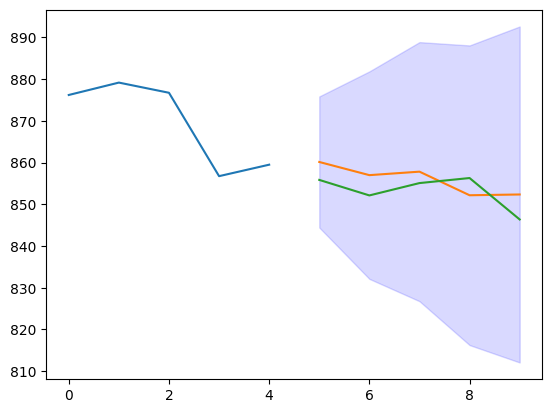

In [91]:
plt.plot(x,y_train[-horizonte:],
         x_p,y_pred,
         x_p,y_true)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)